In [7]:
# Nhập các thư viện cần thiết cho dự án này
import numpy as np    # Thư viện hỗ trợ tính toán số học với mảng và ma trận.
import pandas as pd   # Thư viện hỗ trợ xử lý và phân tích dữ liệu dưới dạng bảng (DataFrame).

# Thư viện trực quan hóa dữ liệu
import seaborn as sns  # Thư viện trực quan hóa dữ liệu dựa trên matplotlib, dễ dùng và đẹp mắt.
import matplotlib.pyplot as plt  # Thư viện cốt lõi để vẽ đồ thị trong Python.
import sklearn

In [8]:
#imports từ thư viện sklearn
from sklearn import datasets  # Thư viện chứa các bộ dữ liệu mẫu, giúp thử nghiệm mô hình.
from sklearn.linear_model import LinearRegression  # Thư viện cung cấp thuật toán hồi quy tuyến tính.
from sklearn.model_selection import train_test_split, cross_val_score  # Chức năng để chia tập dữ liệu thành tập huấn luyện và kiểm tra, và tính toán điểm số với cross-validation.
from sklearn.metrics import mean_squared_error  # Thư viện tính toán sai số bình phương trung bình (MSE).


In [19]:
import pandas as pd
import numpy as np

# URL chứa dữ liệu gốc
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Tải dữ liệu về
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Xử lý và chia dữ liệu thành các mảng
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # Các đặc trưng
target = raw_df.values[1::2, 2]  # Giá nhà (biến mục tiêu)

# Đặt tên cho các cột
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Tạo DataFrame từ dữ liệu và thêm cột 'PRICE' cho giá nhà
boston = pd.DataFrame(boston_data, columns=columns)
boston['PRICE'] = target

# Tạo biến bos từ DataFrame boston
bos = boston.copy()  # Sao chép DataFrame để tránh thay đổi dữ liệu gốc

# Hiển thị 5 dòng đầu tiên của bos
print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [20]:
bos.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [21]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


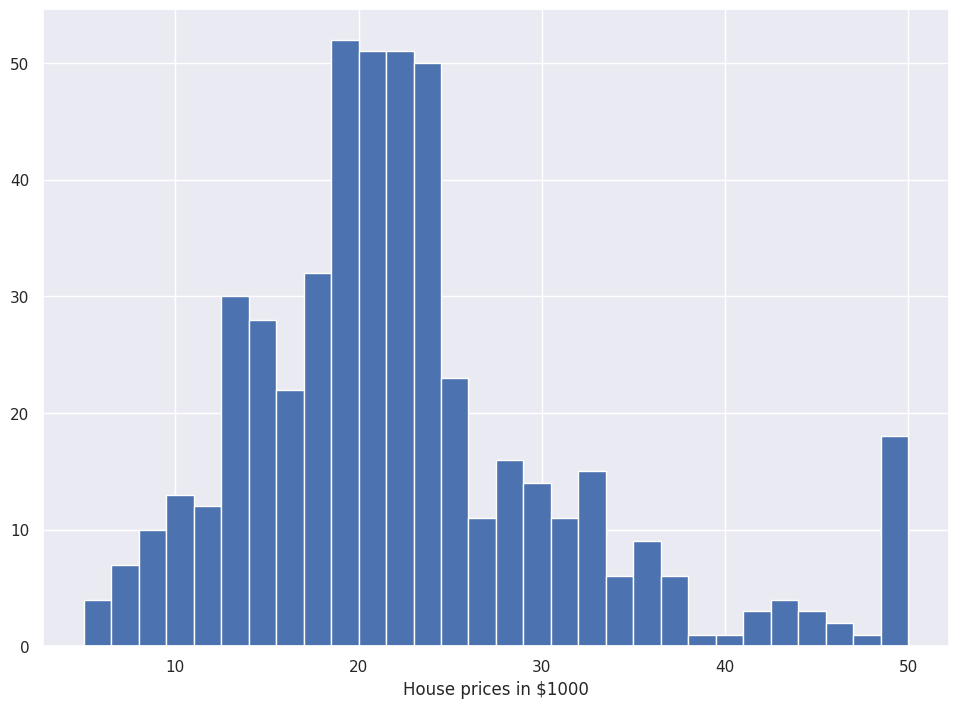

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

<Axes: >

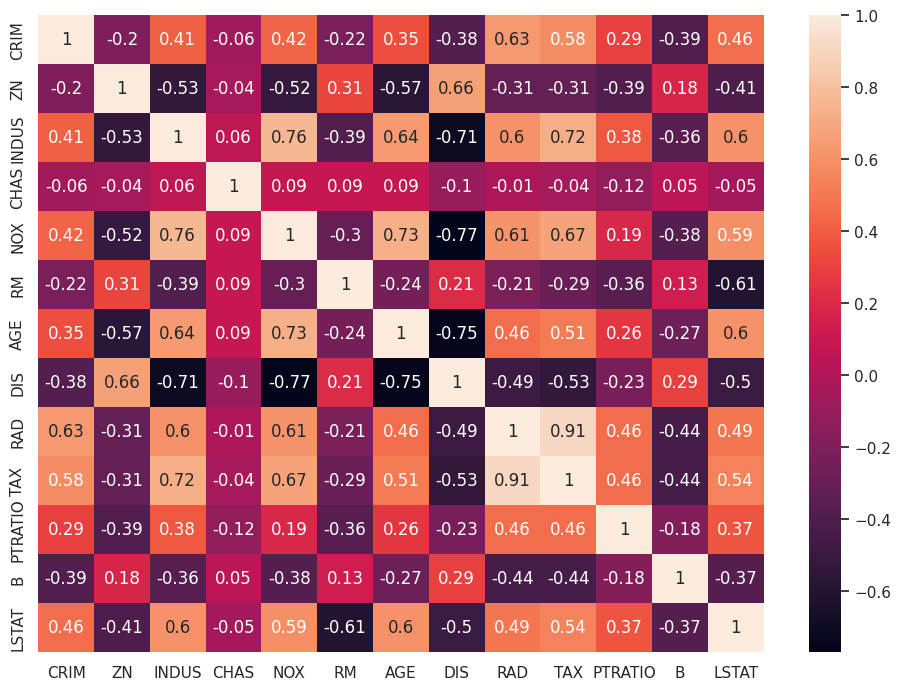

In [27]:
# Tạo một DataFrame mà không có cột giá, vì chúng ta cần xem mối tương quan giữa các biến
bos_1 = boston.drop(columns=['PRICE'])  # Loại bỏ cột 'PRICE'

# Tính toán ma trận tương quan và làm tròn đến 2 chữ số thập phân
correlation_matrix = bos_1.corr().round(2)

# Vẽ biểu đồ nhiệt (heatmap) cho ma trận tương quan, hiển thị giá trị tương quan
sns.heatmap(data=correlation_matrix, annot=True)

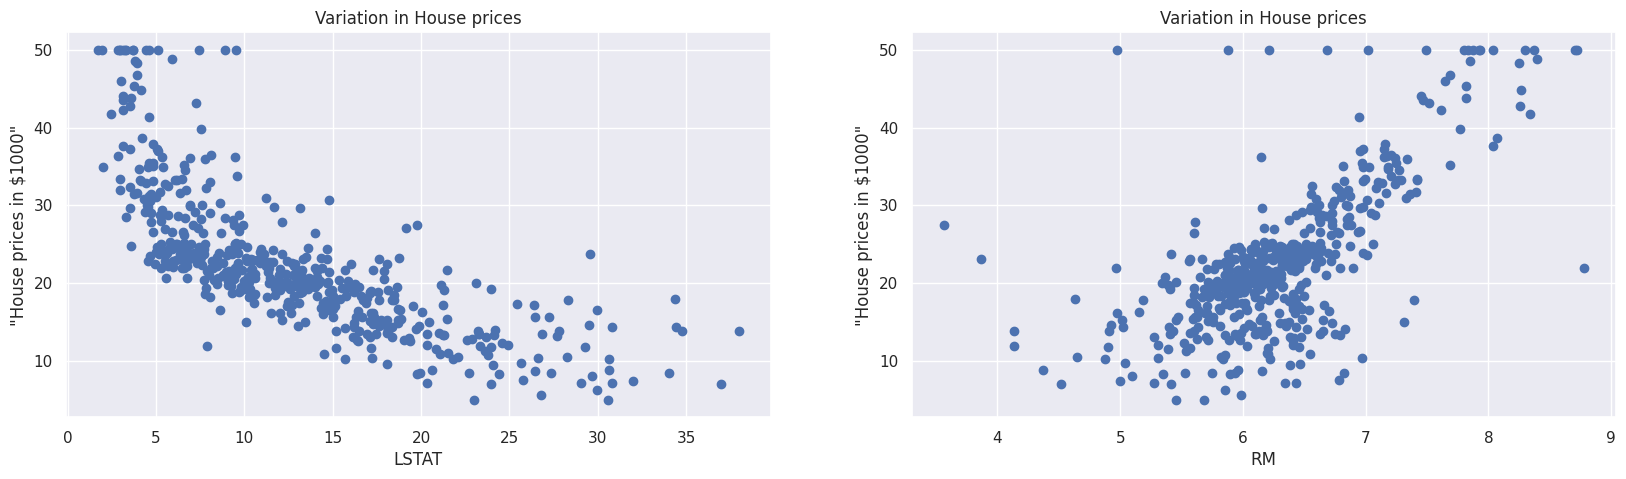

In [28]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [29]:
X_rooms = bos.RM
y_price = bos.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [30]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

reg_1 = LinearRegression()  # Khởi tạo mô hình hồi quy tuyến tính
reg_1.fit(X_train_1, Y_train_1)  # Huấn luyện mô hình với dữ liệu huấn luyện

y_train_predict_1 = reg_1.predict(X_train_1)  # Dự đoán giá trị đầu ra cho tập huấn luyện

mae = mean_absolute_error(Y_train_1, y_train_predict_1)  # Tính MAE
mse = mean_squared_error(Y_train_1, y_train_predict_1)  # Tính MSE
r2 = round(reg_1.score(X_train_1, Y_train_1), 2)  # Tính điểm R2

print("Hiệu suất mô hình cho tập huấn luyện")
print("--------------------------------------")
print('MAE là {}'.format(mae))  # In MAE
print('MSE là {}'.format(mse))  # In MSE
print('Điểm R2 là {}'.format(r2))  # In điểm R2
print("\n")


Hiệu suất mô hình cho tập huấn luyện
--------------------------------------
MAE là 4.710645485019309
MSE là 48.612648648611334
Điểm R2 là 0.43




In [34]:
# Đánh giá mô hình cho tập kiểm tra
y_pred_1 = reg_1.predict(X_test_1)  # Dự đoán giá trị đầu ra cho tập kiểm tra

mae = mean_absolute_error(Y_test_1, y_pred_1)  # Tính MAE
mse = mean_squared_error(Y_test_1, y_pred_1)  # Tính MSE
r2 = round(reg_1.score(X_test_1, Y_test_1), 2)  # Tính điểm R²

print("Hiệu suất mô hình cho tập kiểm tra")
print("--------------------------------------")
print("MAE: {}".format(mae))  # In MAE
print("MSE: {}".format(mse))  # In MSE
print("R^2: {}".format(r2))  # In điểm R²
print("\n")


Hiệu suất mô hình cho tập kiểm tra
--------------------------------------
MAE: 3.4700049049355406
MSE: 23.970455527991305
R^2: 0.69




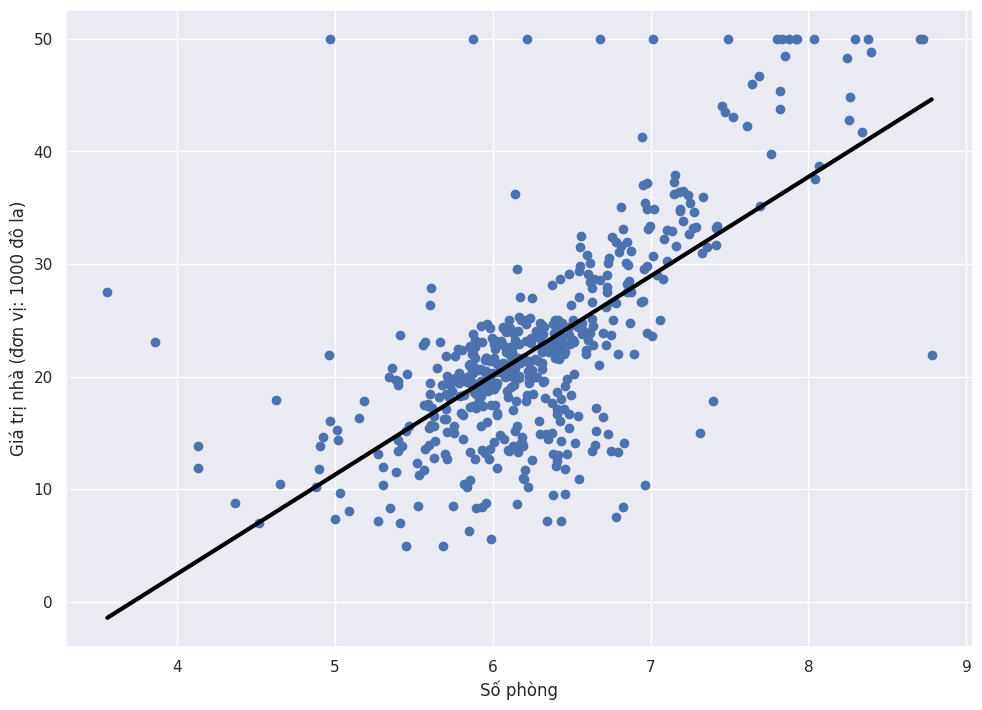

In [36]:
# Tạo không gian dự đoán từ giá trị nhỏ nhất đến giá trị lớn nhất của số phòng
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

# Vẽ biểu đồ phân tán giữa số phòng và giá nhà
plt.scatter(X_rooms, y_price)

# Vẽ đường hồi quy cho mô hình dự đoán trên không gian dự đoán
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)

# Gán nhãn cho trục y
plt.ylabel('Giá trị nhà (đơn vị: 1000 đô la)')

# Gán nhãn cho trục x
plt.xlabel('Số phòng')

# Hiển thị biểu đồ
plt.show()


In [41]:
# Tạo biến X và y từ DataFrame bos
X = bos.drop('PRICE', axis=1)  # Lấy tất cả các cột trừ cột 'PRICE'
y = bos['PRICE']  # Cột giá nhà là biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)  # Huấn luyện mô hình với dữ liệu huấn luyện

# Đánh giá mô hình cho tập huấn luyện
y_train_predict = reg_all.predict(X_train)  # Dự đoán giá trị cho tập huấn luyện

mae = mean_absolute_error(y_train, y_train_predict)  # Tính MAE
mse = mean_squared_error(y_train, y_train_predict)  # Tính MSE
r2 = round(reg_all.score(X_train, y_train), 2)  # Tính điểm R²

print("Hiệu suất mô hình cho tập huấn luyện")
print("--------------------------------------")
print('Mean Absolute Error (MAE): {}'.format(mae))  # In MAE
print('Mean Squared Error (MSE): {}'.format(mse))  # In MSE
print('R^2: {}'.format(r2))  # In điểm R²
print("\n")


Hiệu suất mô hình cho tập huấn luyện
--------------------------------------
Mean Absolute Error (MAE): 3.314771626783228
Mean Squared Error (MSE): 21.641412753226312
R^2: 0.75




In [48]:
# Tạo mô hình Decision Tree Regression
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_train, y_train)  # Huấn luyện mô hình
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_predict = reg_tree.predict(X_train)
y_test_predict = reg_tree.predict(X_test)

# Đánh giá mô hình
mae_train = mean_absolute_error(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

mae_test = mean_absolute_error(y_test, y_test_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

# In kết quả đánh giá
print("Đánh giá mô hình Decision Tree Regression trên tập huấn luyện")
print("-----------------------------------------------------------")
print('Mean Absolute Error (MAE) - Train: {}'.format(mae_train))
print('Mean Squared Error (MSE) - Train: {}'.format(mse_train))
print('R^2 - Train: {}'.format(r2_train))
print("\n")

print("Đánh giá mô hình Decision Tree Regression trên tập kiểm tra")
print("-----------------------------------------------------------")
print('Mean Absolute Error (MAE) - Test: {}'.format(mae_test))
print('Mean Squared Error (MSE) - Test: {}'.format(mse_test))
print('R^2 - Test: {}'.format(r2_test))
print("\n")


Đánh giá mô hình Decision Tree Regression trên tập huấn luyện
-----------------------------------------------------------
Mean Absolute Error (MAE) - Train: 1.9637830343184697
Mean Squared Error (MSE) - Train: 7.078696760120875
R^2 - Train: 0.9185171013474737


Đánh giá mô hình Decision Tree Regression trên tập kiểm tra
-----------------------------------------------------------
Mean Absolute Error (MAE) - Test: 2.308156816332771
Mean Squared Error (MSE) - Test: 8.553906584646844
R^2 - Test: 0.8833565347917995


